# Metody Numeryczne

## Rozkład QR

### dr hab. inż. Jerzy Baranowski, Prof.AGH

## Podprzestrzenie macierzy $A$

Kolumny macierzy $A$ określają nam podprzestrzenie wszystkich wektorów, które można z nich skonstruoować:
$$
\langle a_1\rangle \subseteq \langle a_1,a_2\rangle \subseteq\langle a_1,a_2,a_3\rangle\subseteq\dots\subseteq\langle A\rangle
$$



## Rozkład QR
Idea rozkładu QR to znalezienie ciągu wektorów ortonormalnych $q_1,\ q_2,\ q_3,\ \ldots$, które będą określać te same podprzestrzenie. 

Chcemy aby ciąg $q_1,\ q_2,\ q_3,\ \ldots$ miał własność
$$
\langle q_1,\ q_2,\ \ldots\ q_j\rangle = \langle a_1,\ a_2,\ \ldots\ a_j\rangle,\ j=1,\ldots n
$$

Przy czym $A\in C^{m\times n}$, gdzie $m>n$, ma pełny rząd.

## Rozkład QR
Jest to równoważne następującej postaci:

$$
\left[
\begin{array}{c|c|c|c}
&& \\
&& \\
a_1 & a_2 & \dots &a_n  \\
&& \\
&&
\end{array}
\right]
=
\left[
\begin{array}{c|c|c|c}
&& \\
&& \\
q_1 & q_2 & \dots &q_n  \\
&& \\
&&
\end{array}
\right]
\begin{bmatrix}
r_{11}&r_{12}&\dots&r_{1n}\\
&r_{22}&&\vdots\\
&&\ddots&\vdots\\
&&&r_{nn}
\end{bmatrix}
$$

## Istnienie i jednoznaczność

Każda macierz ma rozkład QR

Każda macierz pełnego rzędu ma jednoznacznie określony rozkład QR, taki, że $r_{ii}>0$

## Ortogonalizacja Grama-Schmidta - konstrukcja wektorów ortogonalnych
Idea jest następująca -  w kroku $j$ chcemy znaleźć wektor $q_j\in \langle a_1,\ a_2,\ \ldots\ a_j\rangle$, który jest ortogonalny do wszystkich wektorów $q_1,\ q_2,\ \ldots\ q_{j-1}$.

Taki wektor możemy skonstruować korzystając z rzutowania kolumny $a_j$ na poprzedzające wektory tj.
$$
v_j = a_j-(q^*_1 a_j)q_1-(q^*_2 a_j)q_2-\ldots-(q^*_{n-1} a_j)q_{n-1}
$$
$v_j$ jest ortogonalny do $q_1,\ q_2,\ \ldots\ q_{j-1}$ ale nie jest ortonormalny - uzyskamy to przez podzielenie go przez jego normę $$q_j=v_j/\|v_j\|$$

Współczynniki $r_{ij}$ dostaniemy obliczając stosowne iloczyny skalarne.

In [28]:
import numpy as np
import numpy.linalg as nplin
import scipy
import matplotlib.pyplot as plt
import scipy.sparse.linalg

In [29]:
def class_gram_schmidt(A):
    m,n = A.shape
    V=A.copy().astype(float)
    Q=A.copy().astype(float)
    R=np.zeros([n,n])
    for j in range(0,n):
        for i in range(0,j):
            R[i,j]=Q[:,i].T@A[:,j]
            V[:,j]=V[:,j]-R[i,j]*Q[:,i]
        R[j,j]=np.linalg.norm(V[:,j])
        Q[:,j]=V[:,j]/R[j,j]    
    return Q,R

In [30]:
A=np.array([[1,1],[2,2],[3,0]])
Q,R=class_gram_schmidt(A)
print(R)
print(Q)
print(Q@R)

[[3.74165739 1.33630621]
 [0.         1.79284291]]
[[ 0.26726124  0.35856858]
 [ 0.53452248  0.71713717]
 [ 0.80178373 -0.5976143 ]]
[[1. 1.]
 [2. 2.]
 [3. 0.]]


## Usprawnienie ortogonalizacji Grama-Schmidta
Możliwe jest przekształcenie metody z wykorzystaniem koncepcji rzutów ortogonalnych. 

Bardziej stabilne numerycznie od dokonania rzutów na kolumny, jest dokonywanie rzutów na komplementarne podprzestrzenie (zamiast na tą wyznaczoną przez wektor $q_j$ na całą resztę).

Wzory są analitycznie równoważne, ale ze względu na zmienioną kolejność działań bardziej stabilne numerycznie.

In [31]:
def mod_gram_schmidt(A):
    m,n = A.shape
    V=A.copy().astype(float)
    Q=A.copy().astype(float)
    R=np.zeros([n,n])
    for i in range(0,n):
        R[i,i]=np.linalg.norm(V[:,i])
        Q[:,i]=V[:,i]/R[i,i]
        for j in range(i+1,n):
            R[i,j]=Q[:,i].T@V[:,j]
            V[:,j]=V[:,j]-R[i,j]*Q[:,i]
    return Q,R

In [32]:
Q,R=mod_gram_schmidt(A)
print(R)
print(Q)
print(Q@R)

[[3.74165739 1.33630621]
 [0.         1.79284291]]
[[ 0.26726124  0.35856858]
 [ 0.53452248  0.71713717]
 [ 0.80178373 -0.5976143 ]]
[[1. 1.]
 [2. 2.]
 [3. 0.]]


## Porównanie metod

Wersja zmodyfikowana, generuje mniej błędów zaokrągleń. 

Zobaczymy to na przykładzie losowo wygenerowanej macierzy kwadratowej z wykładniczo zanikającymi wartościami singularnymi (od $\frac{1}{2}$ do $2^{-80}$). Przeanalizujemy jak zachowują się elementy na przekątnej macierzy $R$, które w tym przypadku powinny być bliskie wartościom singularnym.






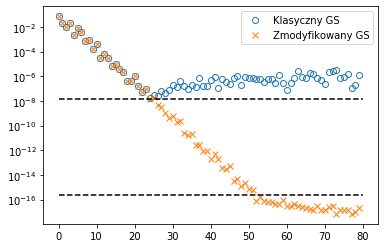

In [33]:
np.random.seed(42)
U,_ = np.linalg.qr(np.random.rand(80,80))
V,_ = np.linalg.qr(np.random.rand(80,80))
S = np.diag(2.**(-1*np.array([*range(1,81)])))
A=U@S@V


QC,RC = class_gram_schmidt(A)
QM,RM = mod_gram_schmidt(A)

fig,ax = plt.subplots(1,1)
ax.semilogy(np.diag(RC),linestyle='None',marker='o',fillstyle='none',label='Klasyczny GS')
ax.semilogy(np.diag(RM),linestyle='None',marker='x',label='Zmodyfikowany GS')

ax.semilogy([0,80],np.sqrt(2.**(-52)*np.array([1.,1.])),linestyle='--',color='black')
ax.semilogy([0,80],(2.**(-52)*np.array([1.,1.])),linestyle='--',color='black')
plt.legend()

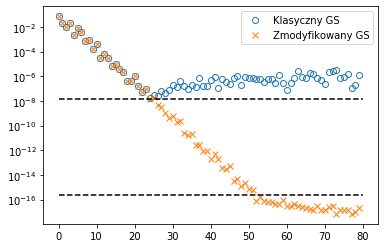

In [34]:
fig

## Złożoność obliczeniowa

W celu przeprowadzenia faktoryzacji QR w oparciu o faktoryzację Grama-Schmidta konieczne jest wykonanie $O(2mn^2)$ obliczeń.

## Triangularyzacja Hausholdera

Ortogonalizację Grama-Shmidta można traktować, jako sekwencję operacji mnożenia przez macierze trójkątne tak, aby uzyskać macierz z ortogonalnymi kolumnami:
$$
A\underbrace{R_1R_2\dots R_n}_{R^{-1}}=Q
$$

Alternatywne podejście to triangularyzacja Hausholdera, która przeprowadza sekwencję mnożenia przez macierze unitarne w celu uzyskania macierzy trójkątnej:

$$
\underbrace{Q_n\dots Q_2 Q_1}_{Q^{*}}A=R
$$


## Triangularyzacja

$$
\begin{bmatrix}
\times&\times&\times\\
\times&\times&\times\\
\times&\times&\times\\
\times&\times&\times\\
\times&\times&\times
\end{bmatrix}
\xrightarrow{Q_1}
\begin{bmatrix}
\times&\times&\times\\
0&\times&\times\\
0&\times&\times\\
0&\times&\times\\
0&\times&\times
\end{bmatrix}
\xrightarrow{Q_2}
\begin{bmatrix}
\times&\times&\times\\
&\times&\times\\
&0&\times\\
&0&\times\\
&0&\times
\end{bmatrix}
\xrightarrow{Q_3}
\begin{bmatrix}
\times&\times&\times\\
&\times&\times\\
&&\times\\
&&0\\
&&0
\end{bmatrix}
$$

Macierze $Q$ konstruujemy z użyciem tzw. odbić Hausholdera

In [35]:
def hauss_QR(A):
    A=A.astype(float)
    m,n = A.shape
    V=np.zeros([m,n])
    Q=np.zeros([m,m])
    for k in range(0,n):
        e1=np.zeros(m-k)
        e1[0]=1
        x=A[k:m,k]
        V[k:m,k]=np.sign(x[0])*np.linalg.norm(x)*e1+x
        V[k:m,k]=V[k:m,k]/np.linalg.norm(V[k:m,k])
        pom=V[k:m,[k]].T@A[k:m,k:n]
        A[k:m,k:n]=A[k:m,k:n]-2*V[k:m,[k]]@pom
    I=np.identity(m)
    for k in range(n-1,-1,-1):
        pom=2*V[k:m,[k]]@V[k:m,[k]].T
        I[k:m,:]=I[k:m,:]-pom@I[k:m,:]
    return -I[:,:n],-A[:n,:]


In [36]:
A=np.array([[1,1],[2,2],[3,0]])
Q,R=hauss_QR(A)
print(R)
print(Q)
print(Q@R)

[[3.74165739e+00 1.33630621e+00]
 [4.44089210e-16 1.79284291e+00]]
[[ 0.26726124  0.35856858]
 [ 0.53452248  0.71713717]
 [ 0.80178373 -0.5976143 ]]
[[ 1.00000000e+00  1.00000000e+00]
 [ 2.00000000e+00  2.00000000e+00]
 [ 3.00000000e+00 -2.22044605e-16]]


## Złożoność obliczeniowa

Wykonanie rozkładu QR za pomocą triangularyzacji Hausholdera wymaga wykonania $O\left(2mn^2-\frac{2}{3}n^3\right)$ obliczeń.

## Stabilność

Rozkład QR wykonywany zmodyfikowanym algorytmem Grama-Schmidta lub Triangularyzacją Hausholdera jest stabilny wstecznie.

## Porównanie z LU dla układów z macierzą kwadratową

Jeżeli $m=n$ to rozkład QR wymaga od nas $O(4/3 m^3)$ obliczeń, czyli jest dwa razy wolniejszy od LU.

Nie posiada jednak słabości dla specyficznych macierzy jaką ma LU.

Dla macierzy postaci $$
\begin{bmatrix}
  1  &  0  &  0  &  0  &  0  &  0  &  1 \\
 -1  &  1  &  0  &  0  &  0  &  0  &  1 \\
 -1  & -1  &  1  &  0  &  0  &  0  &  1 \\
 -1  & -1  & -1  &  1  &  0  &  0  &  1 \\
 -1  & -1  & -1  & -1  &  1  &  0  &  1 \\
 -1  & -1  & -1  & -1  & -1  &  1  &  1 \\
 -1  & -1  & -1  & -1  & -1  & -1  &  1 
\end{bmatrix}
$$
stosunek wielkości elementów macierzy $A$ do elementów macierzy $U$ rośnie wykładniczo.



In [37]:
n=7
A=np.diag(np.ones(n))-np.tril(np.ones((n,n)),-1)
A[:,[-1]]=np.ones([n,1])
p, l, u = scipy.linalg.lu(A)
print(u)

[[ 1.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  2.]
 [ 0.  0.  1.  0.  0.  0.  4.]
 [ 0.  0.  0.  1.  0.  0.  8.]
 [ 0.  0.  0.  0.  1.  0. 16.]
 [ 0.  0.  0.  0.  0.  1. 32.]
 [ 0.  0.  0.  0.  0.  0. 64.]]


## Uwarunkowanie i growth factor

In [38]:
n=100
A=np.diag(np.ones(n))-np.tril(np.ones((n,n)),-1)
A[:,[-1]]=np.ones([n,1])

p, l, u = scipy.linalg.lu(A)

print(np.linalg.cond(A))
print(np.max(u))

44.80225124630292
6.338253001141147e+29


## Porównanie z QR

In [39]:

b=np.random.rand(n)
x=scipy.linalg.solve_triangular(u,scipy.linalg.solve_triangular(l,b,lower=True))
q,r=np.linalg.qr(A)
x2 = scipy.linalg.solve_triangular(r,q.T@b)
 
print(np.linalg.norm(A@x-b))
print(np.linalg.norm(A@x2-b))

39.859225145093376
6.3850493682325406e-15


# Metody Numeryczne

## Porównanie metod rozwiązywania problemu najmniejszych kwadratów

### dr hab. inż. Jerzy Baranowski, Prof.AGH

## Przykład - dopasowanie wielomianu stopnia 14 w 100 punktach

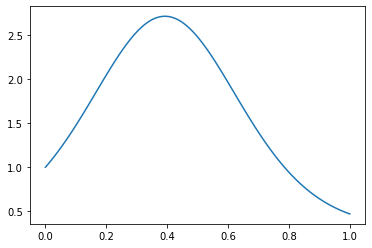

In [40]:
m=100
n=15
t=np.array([i for i in range(0,m)])/(m-1)
A=np.vander(t,15)
b=np.exp(np.sin(4*t))
plt.plot(t,b)
b=b/2006.787453080206
plt.show()

## ``lstsq`` w numpy

In [41]:
c,res,r,s=nplin.lstsq(A,b,rcond=-1)
w_lstsq=c[0]
w_lstsq

0.9999995505673052

## QR

In [42]:
Q,R=nplin.qr(A)
c=nplin.solve(R,Q.T@b)
w_qr=c[0]
w_qr

0.9999995178826113

## SVD

In [43]:
U,s,V=nplin.svd(A,full_matrices=False)
S=np.diag(s)
c=V.T@nplin.solve(S,U.T@b)
w_svd=c[0]
w_svd

0.9999995505595789

## Równania normalne


In [44]:
c=nplin.solve(A.T@A,A.T@b)
w_norm=c[0]
w_norm

-0.6281511821641284

## Podsumowanie błędów


In [45]:
epsilon_lstsq=np.abs(1-w_lstsq)
epsilon_qr=np.abs(1-w_qr)
epsilon_svd=np.abs(1-w_svd)
epsilon_norm=np.abs(1-w_norm)

print("Metoda lstsq: Błąd bezwzględny i względny %10.2e"%(epsilon_lstsq))
print("Rozkład QR: Błąd bezwzględny i względny %10.2e"%(epsilon_qr))
print("Rozkład SVD: Błąd bezwzględny i względny %10.2e"%(epsilon_svd))
print("Równania normalne: Błąd bezwzględny i względny %10.2e"%(epsilon_norm))

Metoda lstsq: Błąd bezwzględny i względny   4.49e-07
Rozkład QR: Błąd bezwzględny i względny   4.82e-07
Rozkład SVD: Błąd bezwzględny i względny   4.49e-07
Równania normalne: Błąd bezwzględny i względny   1.63e+00


## Dlaczego tak się dzieje?

In [46]:
print("Uwarunkowanie macierzy A: %10.2e"%(nplin.cond(A)))
print("Uwarunkowanie macierzy A*A: %10.2e"%(nplin.cond(A.T@A)))

Uwarunkowanie macierzy A:   2.27e+10
Uwarunkowanie macierzy A*A:   1.10e+18
